Decision Tree Classifier

In [91]:
#import necessary libraries for data handling and maths
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('combined_detail_cleaned.csv', encoding = 'ISO-8859-1')
display(dataset.head())

#all features
#features = dataset[['min_temp','max_temp','rain','evap','sun','dir_max_wind','speed_max_wind', '9am_temp', '9am_humid', '9am_cloud', '9am_wind_dir', '9am_wind_speed', '9am_press', '3pm_temp', '3pm_humid', '3pm_cloud', '3pm_wind_dir', '3pm_wind_speed', '3pm_press']]

#features selected by observing scatterplots in OpenRefine, removing features that appear to be correlated with each other. Also removed wind direction featuresas unnecessary. Tried max_temp as feature, but min_temp seems to work better.
#features = dataset[['min_temp', 'rain','evap','sun','speed_max_wind', '3pm_humid', '3pm_cloud', '3pm_press']]

#removed 3pm snapshot features
features = dataset[['min_temp', 'rain','evap','sun','speed_max_wind']]

classlabel = dataset['PRICECATEGORY']

#split dataset (features and class labels) into training and testing sets with indicated proportions. Fix random state for repeatability.
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.7, test_size=0.3, random_state=1)

#create decision tree using entropy as criterion for information gain
dtree = DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=3)
dtree.fit(features_train, class_train)

,DATE,TOTALDEMAND,PRICECATEGORY,min_temp,max_temp,rain,evap,sun,dir_max_wind,speed_max_wind,...,9am_cloud,9am_wind_dir,9am_wind_speed,9am_press,3pm_temp,3pm_humid,3pm_cloud,3pm_wind_dir,3pm_wind_speed,3pm_press
0,1/01/2021,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,22.5,31,...,6,0.0,2,1018.8,28.1,43,5,90.0,13,1015.3
1,1/02/2021,5228.29,MEDIUM,13.4,20.3,0.0,7.4,1.6,180.0,33,...,7,0.0,7,1012.8,19.4,69,7,180.0,13,1011.9
2,1/03/2021,5225.37,LOW,13.8,21.7,0.0,6.4,6.3,180.0,44,...,6,247.5,6,1012.3,19.7,67,6,180.0,15,1012.2
3,1/04/2021,5807.02,MEDIUM,12.4,29.9,0.0,4.4,10.8,337.5,20,...,1,45.0,9,1024.3,28.7,30,3,135.0,7,1021.6
4,1/05/2021,5261.09,MEDIUM,11.2,24.6,0.0,5.4,7.1,0.0,33,...,3,22.5,9,1027.3,24.2,35,7,0.0,17,1024.4


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [92]:
#testing model predictions against test data and calculating accuracy score for model

from sklearn.metrics import accuracy_score

predictions = dtree.predict(features_test)
print(accuracy_score(class_test, predictions))

0.5068493150684932


[Text(697.5, 951.3000000000001, 'min_temp <= 10.95\nentropy = 1.976\nsamples = 170\nvalue = [42, 45, 31, 52]'),
 Text(348.75, 679.5, 'speed_max_wind <= 27.0\nentropy = 1.562\nsamples = 83\nvalue = [38, 32, 2, 11]'),
 Text(174.375, 407.70000000000005, 'min_temp <= 8.55\nentropy = 1.14\nsamples = 26\nvalue = [18, 6, 2, 0]'),
 Text(87.1875, 135.89999999999998, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1, 0, 0]'),
 Text(261.5625, 135.89999999999998, 'entropy = 1.485\nsamples = 10\nvalue = [3, 5, 2, 0]'),
 Text(523.125, 407.70000000000005, 'sun <= 9.05\nentropy = 1.505\nsamples = 57\nvalue = [20, 26, 0, 11]'),
 Text(435.9375, 135.89999999999998, 'entropy = 1.361\nsamples = 50\nvalue = [20, 25, 0, 5]'),
 Text(610.3125, 135.89999999999998, 'entropy = 0.592\nsamples = 7\nvalue = [0, 1, 0, 6]'),
 Text(1046.25, 679.5, 'evap <= 4.1\nentropy = 1.654\nsamples = 87\nvalue = [4, 13, 29, 41]'),
 Text(871.875, 407.70000000000005, 'speed_max_wind <= 34.0\nentropy = 1.957\nsamples = 25\nvalue = [4, 7,

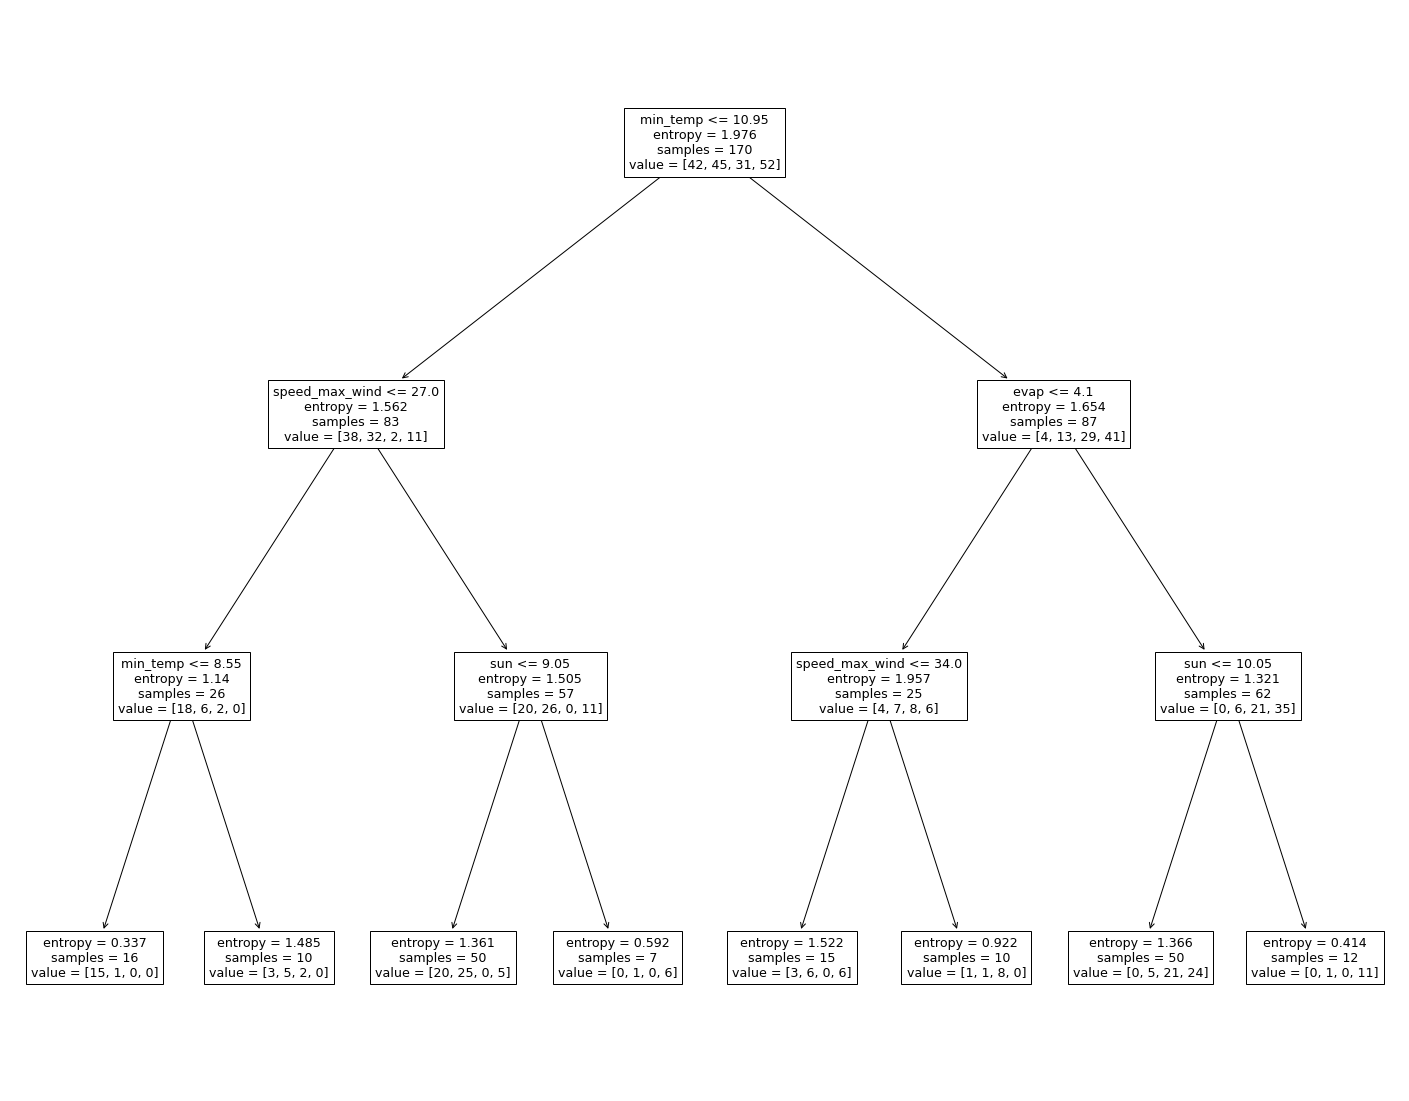

In [93]:
#visualising decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
featurenames = ['min_temp', 'rain','evap','sun','speed_max_wind']
tree.plot_tree(dtree, feature_names=featurenames)

In [ ]:
"""import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_score = []
acc_score_dt = []

for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]
    
    
    # STEP 0
    scaler = preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)

    imputer = SimpleImputer()
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    
    # Instantiate
    feature_selector = SelectKBest(mutual_info_classif, k=15)
    X_train = feature_selector.fit_transform(X_train, y_train)
    X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=15)
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)
    
    # STEP 1
    knn = neighbors.KNe"""
